<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/BatchNorm%26Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import seaborn as sb
from tqdm import tqdm_notebook

In [0]:
trainset = torchvision.datasets.MNIST(root = '/data', train = True, download = True, transform = transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:01, 7641310.95it/s]                            


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 135058.55it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw


1654784it [00:00, 2215975.95it/s]                            
0it [00:00, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw


8192it [00:00, 49730.42it/s]            


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw
Processing...
Done!


In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images[0])
print(images[0].shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [0]:
def imshow(img, title):
  plt.figure(figsize = (batch_size * 2, 2))
  plt.title(title)
  plt.axis('off')
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.show()

In [0]:
def show_batch_images(dataloader):
  image, labels = next(iter(dataloader))

  img = torchvision.utils.make_grid(image)
  imshow(img, [str(x.item()) for x in labels])

  return image, labels

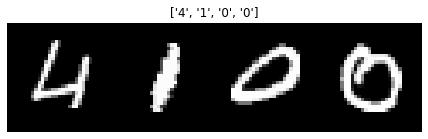

In [0]:
images, labels = show_batch_images(trainloader)

In [0]:
class My_Net(nn.Module):
  def __init__(self):
    super(My_Net, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),  # 28 * 28 = 784
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )
  
  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

In [0]:
class My_Net_BN(nn.Module):
  def __init__(self):
    super(My_Net_BN, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),  # 28 * 28 = 784
        nn.BatchNorm1d(48),  # this layer makes sure mean & standard deviation of 48 nos corresponding to an image  r same.
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )
  
  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

In [0]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
model1 = My_Net()
model1 = model1.to(device)
print(model1)

My_Net(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [0]:
model2 = My_Net_BN()
model2 = model2.to(device)
print(model2)

My_Net_BN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [0]:
loss_func = nn.CrossEntropyLoss()
opt1 = optim.SGD(model1.parameters(), lr = 0.001)
opt2 = optim.SGD(model2.parameters(), lr = 0.001)

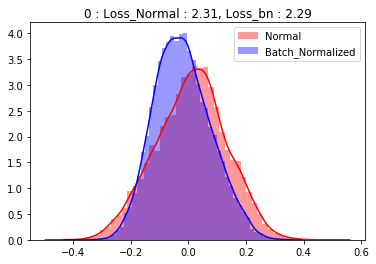

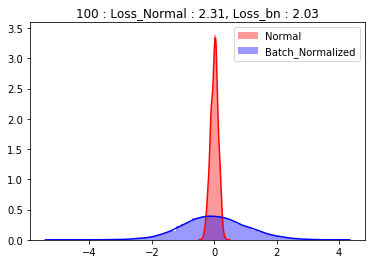


=======X=======



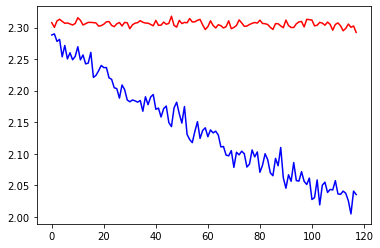

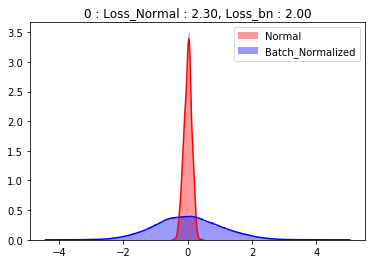

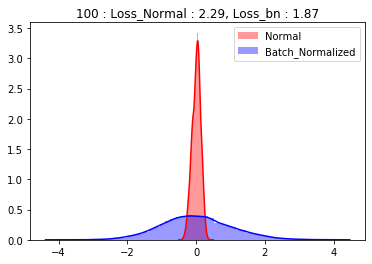


=======X=======



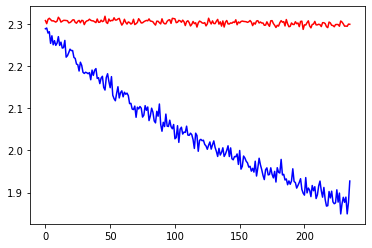

In [0]:
loss_epoch = []
loss_epoch_bn = []
max_epochs = 2

for i in tqdm_notebook(range(max_epochs), total = max_epochs, unit = 'epochs'):

  for j,data in enumerate(trainloader):

    inputs, labels = data
    inputs, labels = inputs.to(device),labels.to(device)

    # training the first model 
    opt1.zero_grad()
    output1 = model1(inputs)
    loss1 = loss_func(output1, labels)
    loss1.backward()
    opt1.step()

    # training second model
    opt2.zero_grad()
    output2 = model2(inputs)
    loss2 = loss_func(output2, labels)
    loss2.backward()
    opt2.step()

    loss_epoch.append(loss1.item())
    loss_epoch_bn.append(loss2.item())

    if j % 100 == 0:
      
      # comparing the working of two models until 24 out_features
      inputs = inputs.view(inputs.size(0), -1)

      model1.eval()   # sets model for evaluating mode instead of training
      model2.eval()
      # model 1 manually written
      a = model1.classifier[0](inputs)
      a = model1.classifier[1](a)
      a = model1.classifier[2](a)
      a = a.cpu()
      a = a.detach().numpy().ravel()
      sb.distplot(a, kde = True, color = 'r', label = 'Normal')

      b = model2.classifier[0](inputs)
      b = model2.classifier[1](b)
      b = model2.classifier[2](b)
      b = model2.classifier[3](b)
      b = model2.classifier[4](b)
      b = b.cpu()
      b = b.detach().numpy().ravel()
      sb.distplot(b, kde = True, color = 'b', label = 'Batch_Normalized')
      plt.title('%d : Loss_Normal : %.2f, Loss_bn : %.2f' % (j, loss1.item(), loss2.item()))
      plt.legend()
      plt.show()

      model1.train()
      model2.train()

  print('\n=======X=======\n')
  plt.plot(loss_epoch, 'r', label = 'Normal')
  plt.plot(loss_epoch_bn, 'b', label = 'Batch_Normalized')
  plt.show()

#Using Convolution Networks with batch_normalization

In [0]:
class CNN_BN(nn.Module):
  def __init__(self):
    super(CNN_BN, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 3, 5),  # (N, 1, 28, 28) --> (N, 3, 24, 24)
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2),  # (N, 3, 24, 24)  --> (N, 3, 12, 12)
        nn.Conv2d(3, 6, 3),  # (N, 3, 12, 12) --> (N, 6, 10, 10)
        nn.BatchNorm2d(6)
    )
    self.features1 = nn.Sequential(
        nn.ReLU(),
        nn.AvgPool2d(2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Linear(150, 25),
        nn.ReLU(),
        nn.Linear(25, 10)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.features1(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

In [0]:
model3 = CNN_BN()
print(model3)

CNN_BN(
  (features): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features1): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=25, bias=True)
    (1): ReLU()
    (2): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [0]:
loss_func = nn.CrossEntropyLoss()
opt3 = optim.SGD(model3.parameters(), lr = 0.01)

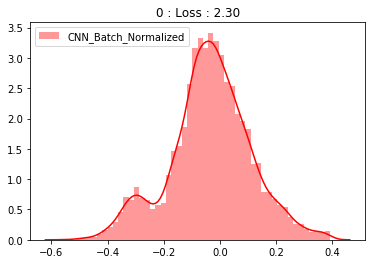

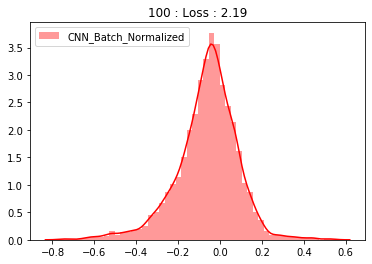

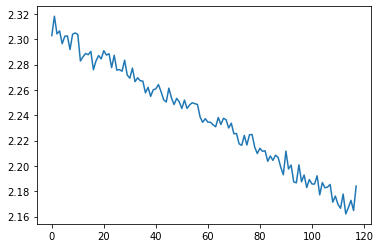

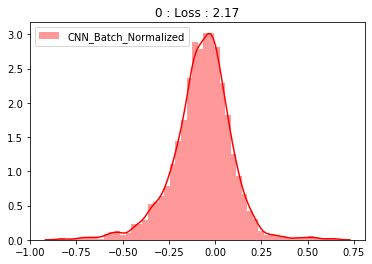

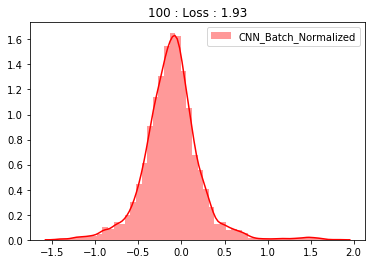

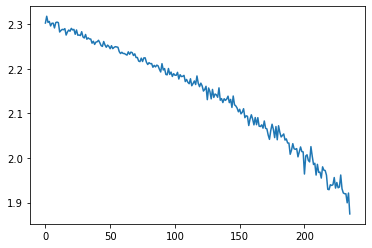

In [0]:
loss_epoch3 =[]
max_epochs = 2

for i in range(max_epochs):

  for j,data in enumerate(trainloader):
    inputs, label = data
    opt3.zero_grad()

    output3 = model3(inputs)
    loss3 = loss_func(output3, label)
    loss3.backward()
    opt3.step()

    loss_epoch3.append(loss3)

    if j % 100 == 0:
      #inputs = inputs.view(inputs.size(0), -1)
      
      model3.eval()
       
       # comparison between different layers
     # a = model3.features(inputs)
      #a = model3.classifier(a)
      output3 = output3.detach().numpy().ravel()
      sb.distplot(output3, kde = True, color = 'r', label = 'CNN_Batch_Normalized')

   #   b = model3.features1(inputs)
    #  b = model3.classifier(b)
     # b = b.detach().numpy().ravel()
     # sb.distplot(b, kde = True, color = 'b', label = 'CNN_Normal')
      plt.title('%d : Loss : %.2f' % (j, loss3.item()))
      plt.legend()
      plt.show()
      model3.train()

  print('=========')
  plt.plot(loss_epoch3)
  plt.show()


In [0]:
N = 25
noise = 0.3
X_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_train = X_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

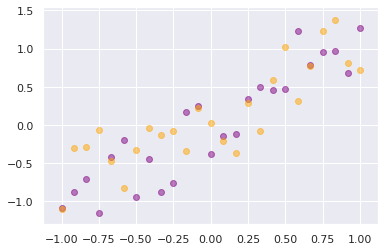

In [0]:
sb.set()
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c = 'purple', alpha = 0.5, label = 'train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c = 'orange', alpha = 0.5, label = 'test')
plt.show()

In [0]:
n_h = 100

model = nn.Sequential(
    nn.Linear(1, n_h),
    nn.ReLU(),
    nn.Linear(n_h, n_h),
    nn.ReLU(),
    nn.Linear(n_h, 1)
)
model_dropout = nn.Sequential(
    nn.Linear(1, n_h),
    nn.Dropout(0.5),  # probability of dropping neurins in a network
    nn.ReLU(),
    nn.Linear(n_h, n_h),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(n_h, 1),
) 

In [0]:
opt = optim.Adam(model.parameters(), lr = 0.01)
opt_dropout = optim.Adam(model_dropout.parameters(), lr = 0.01)
loss_func = nn.MSELoss()

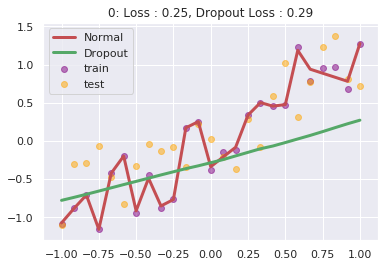

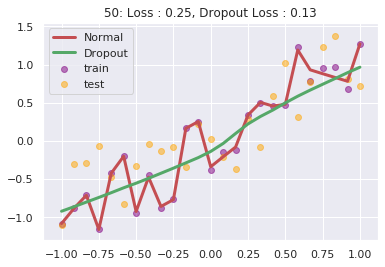

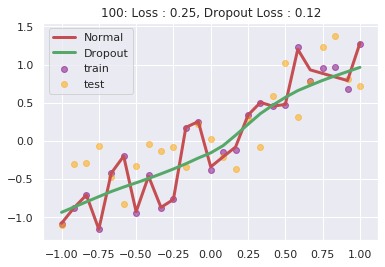

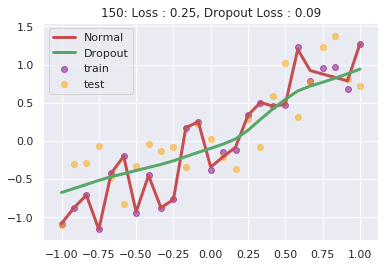

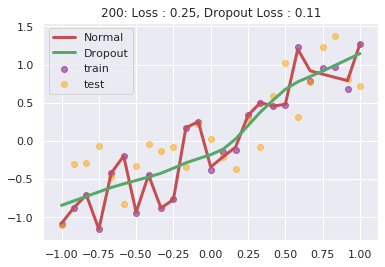

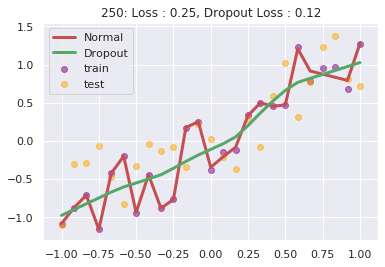

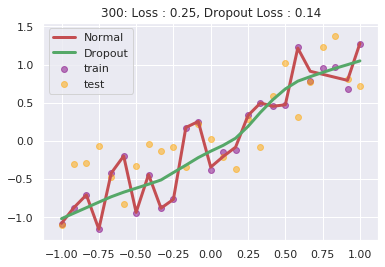

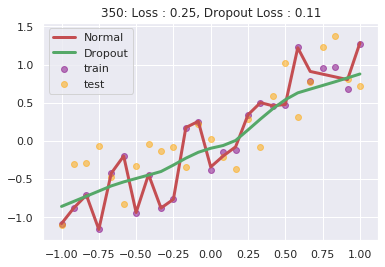

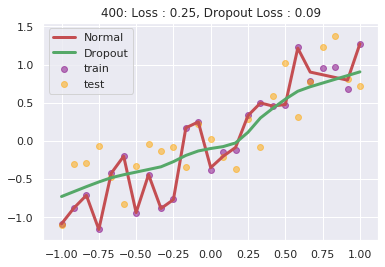

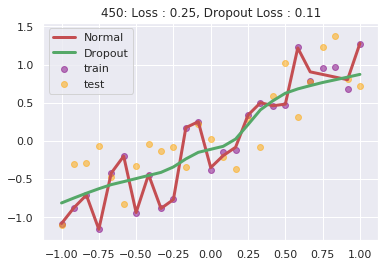

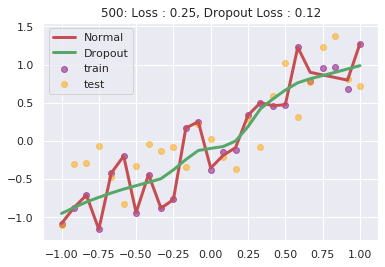

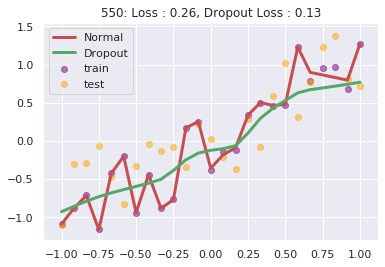

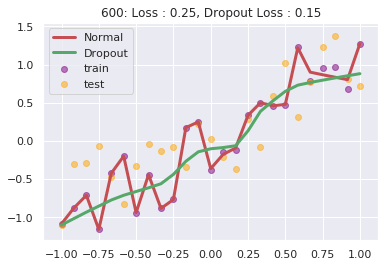

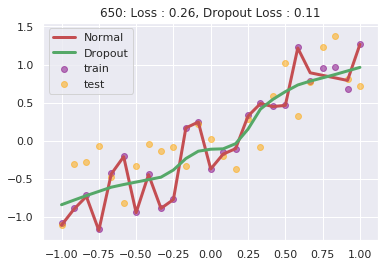

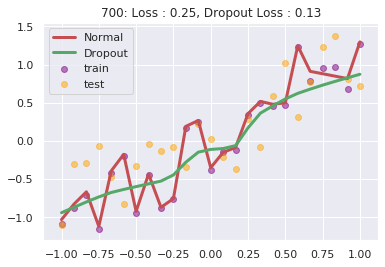

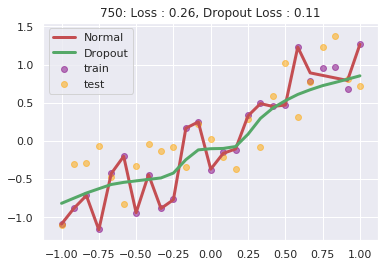

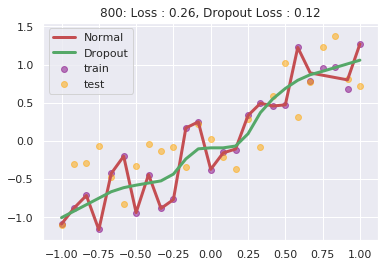

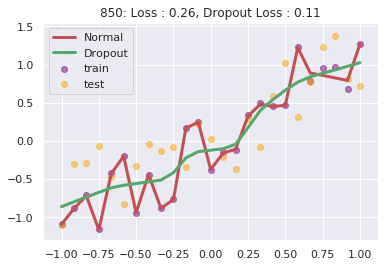

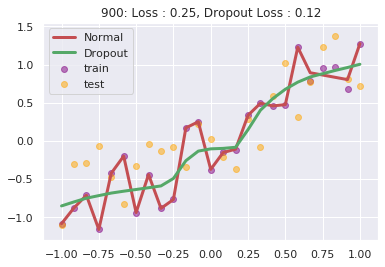

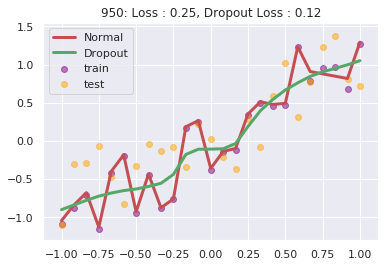

In [0]:
max_epochs = 1000

for i in range(max_epochs):
  output = model(X_train)
  loss = loss_func(output, Y_train)
  opt.zero_grad()
  loss.backward()
  opt.step()

  output_dropout = model_dropout(X_train)
  loss = loss_func(output_dropout, Y_train)
  opt_dropout.zero_grad()
  loss.backward()
  opt_dropout.step()

  if i % 50 == 0:

    model.eval()
    model_dropout.eval()

    pred = model(X_test)
    pred_loss = loss_func(pred, Y_test)

    pred_dropout = model_dropout(X_test)
    pred_dropout_loss = loss_func(pred_dropout, Y_test)
    plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c = 'purple', alpha = 0.5, label = 'train')
    plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c = 'orange', alpha = 0.5, label = 'test')
    plt.plot(X_test.data.numpy(), pred.data.numpy(), 'r-', lw = 3, label = 'Normal')
    plt.plot(X_test.data.numpy(), pred_dropout.data.numpy(), 'g-', lw = 3, label = 'Dropout')

    plt.title('%d: Loss : %.2f, Dropout Loss : %.2f' % (i, pred_loss, pred_dropout_loss))
    plt.legend()
    plt.show()
    model.train()
    model_dropout.train()